# Интерполирование функций

In [1]:
import random
# модули для математических операций
import math
import numpy as np
# модули для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
# модули для работы с данными
import pandas as pd
pd.options.display.float_format ='{:,.4f}'.format

# Задача 1

1. На отрезке $[a,b]$ задана таблица значений функции $f(x)$ с шагом $h$. Погрешность каждого заданного значения не превышает $\varepsilon$. Используя интерполирование Ньютона для начала и конца таблицы, с помощью многочленов минимальной степени построить таблицу значений функции $f(x)$ с шагом $0.5h$. Погрешность каждого нового значения также не должна превышать заданной величины $\varepsilon$. В отчет включить обе таблицы значений, а также подробное описание выбора степени интерполирующих многочленов.

$$f(x) = xe^{-x},\quad [a,b] = [0,2],\quad h = \dfrac{1}{10},\quad \varepsilon = 10^{-4}$$

Запишем в программном виде все входные данные:

In [2]:
def f(x):
    return x * np.e**(-x)

a, b = 0, 2
h = 1 / 10
epsilon = 1e-4

Программно реализуем построение текущего вида таблицы исходных данных интерполирования:

In [3]:
N = int((b-a) / h)
x = np.around(np.array([a + i*h for i in range(N)]), 4)

table = pd.DataFrame.from_dict({
    'x' : x, 
    'f(x)' : np.around(f(x), 4)}, orient='index')
table

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
x,0.0000,0.1000,0.2000,0.3000,0.4000,0.5000,0.6000,0.7000,0.8000,0.9000,1.0000,1.1000,1.2000,1.3000,1.4000,1.5000,1.6000,1.7000,1.8000,1.9000
f(x),0.0000,0.0905,0.1637,0.2222,0.2681,0.3033,0.3293,0.3476,0.3595,0.3659,0.3679,0.3662,0.3614,0.3543,0.3452,0.3347,0.3230,0.3106,0.2975,0.2842


При интерполировании в начале таблицы остаток интерполирования мы можем оценить следующим образом:
$$|r_k(x)| \leq \left|h^{k+1}\dfrac{t(t-1)\ldots (t-k)}{(k+1)!}\right|\cdot \max_{x\in[a,b]}|f^{(k+1)}(x)| < \varepsilon, \quad t = \dfrac{x-x_0}{h},$$
причем в данном случчае $t = \dfrac{1}{2}.$
Подставим входные данные $$\left|\left(\dfrac{1}{10}\right)^{k+1}\cdot\dfrac{\frac12(\frac12-1)\ldots (\frac12-k)}{(k+1)!}\right|\cdot \max_{x\in[0,2]}|(xe^{-x})^{(k+1)}| < 10^{-4}.$$

Из полученного неравенства путем подбора будем вычислять значение $k$.
Пусть $k = 2$. Тогда
$$f'(x) = -e^{-x}(x-1),$$
$$f^{(2)}(x) = e^{-x}(x-2),$$
$$f^{(3)}(x) = -e^{-x}(x-3).$$
Каждую из производных мы можем легко оценить сверху следующим образом:
$$|f^{(s)}(x)| = |(-1)^s e^{-x} (x-s)| \leq |(x-s)| \underset{x\in[0,2]}{\leq} s,\quad s=1,2,\ldots.$$
А значит $$\max_{x\in[0,2]}|f^{(3)}(x)| = 3.$$
Второй множитель равен $$\left|\dfrac{1}{10^3}\cdot\dfrac{\frac12(\frac12-1)(\frac12-2)}{3!}\right| = 10^{-3}\cdot \dfrac{1}{2^4}.$$
Тогда оценка погрешности равна $$|r_2(x)|=\dfrac{3}{16}\cdot 10^{-3}> 10^{-4}.$$ Следовательно, $k > 2$.

Пусть $k=3$. Тогда $$\max_{x\in[0,2]}|f^{(4)}(x)| = 4.$$
Второй множитель равен $$\left|\dfrac{1}{10^4}\cdot\dfrac{\frac12(\frac12-1)(\frac12-2)(\frac12-3)}{4!}\right| = 10^{-4}\cdot \dfrac{5}{2^7}.$$
Тогда оценка погрешности равна $$|r_3(x)|\leq 10^{-4}\cdot \dfrac{5}{2^7} < 10^{-4}.$$ Таким образом, нам подходит $k=3$.

**Конечная разность нулевого порядка** совпадает со значением функции $f(x_i) = y_i$.

**Конечная разность первого порядка** определяется равенствами  $$\Delta y_i = y_{i+1} - y_i.$$
**Конечная разность $k$-ого порядка** определяется равенствами $$\Delta ^k y_i = \Delta (\Delta^{k-1} y_i) = \Delta ^{k-1}y_{i+1} - \Delta ^{k-1}y_i.$$

Далее необходимо определить, согласуется ли найденное значение $k$ с поведением конечных разностей, а именно должно выполняться $$|\Delta^{k+1} y_0|<\varepsilon.$$

Реализуем компьютерно формулу для вычисления конечных разностей $$\Delta ^k y_i = \sum_{j=0}^{k}(-1)^j C^j_k y_{i+k-j}.$$

In [4]:
def C(n, k):
    C = np.zeros((n+1, n+1))
    for i in range(n+1):
        C[i,0]=1
        C[i,i]=1
        for j in range(1,i):
            C[i, j]=C[i-1, j-1]+C[i-1, j]
    return C[n,k]

def delta_y(x, f, k, i):
    sum = 0
    for j in range(k+1):
        sum += (-1)**j * C(k, j) * f(x[i+k-j])
    return sum

Теперь проверим выполнение условия $|\Delta^4 y_0| < \varepsilon$.

In [5]:
delta_y(x, f, 4, 0) < epsilon

True

Таким образом, в условиях погрешности разделенные разности при $k>3$ не являются содержательными при построении интерполяционного многочлена.

Для окончательного подтверждения правильности выбора $k$ найдем оценку остатка интерполирования в конце таблицы при заданном $k$. Если погрешность в конце таблицы также будет не превосходить заданной точности, то мы сможем переходить к построению интерполяционного многочлена. Оценка для погрешности в конце таблицы следующая: $$|r_k(x)| \leq \left|h^{k+1}\dfrac{t(t+1)\ldots (t+k)}{(k+1)!}\right|\cdot \max_{x\in[a,b]}|f^{(k+1)}(x)|<\varepsilon.$$
Тогда при подстановке известных значений $$|r_3(x)| \leq \dfrac{5\cdot 7}{2^7} \cdot 10^{-4} < 10^{-4}.$$

Соответственно заданное $k=3$ подходит для интерполирования в начале и в конце таблицы.

Теперь строим сам интерполяционный многочлен в начале и в конце таблицы соответственно по формулам
$$P_k(x) = P_k(x+th) = y_0 + \dfrac{t}{1!}\Delta y_0 + \dfrac{t(t-1)}{2!} \Delta^2y_0 + \ldots + \dfrac{t(t-1)\ldots (t-k+1)}{k!}\Delta^k y_0,\ x\in[x_0, x_1]$$
$$P_k(x) = P_k(x_n - th) = y_n + \dfrac{t}{1!}\Delta y_{n-1} + \dfrac{t(t+1)}{2!}\Delta^2 y_{n-2} + \ldots + \dfrac{t(t+1)\ldots (t+k-1)}{k!}\Delta^k y_{n-k},\ x\in [x_{n-1}, x_n].$$

Поскольку по первой формуле мы можем найти значение между первыми двумя узлами, а по второй -- между последними двумя узлами, то при построении интерполяционных многочленов на каждой $i$-ой итерации мы будем вычислять значение $\Delta^k y_i$, а для нижнего -- $\Delta^k y_{i-k}$. Причем также стоит учесть тот факт, что мы ни одним из этих многочленов не сможем покрыть всю новую таблицу. А именно мы не сможем вычислить последние (первые) $k$ узлов по формуле для интерполирования в начале (в конце) таблицы. Поэтому в качестве значений, которые лежат между первыми и последними $k$ узлами, мы будем брать максимальное из двух (одно будет построено с помощью верхнего многочлена, а второе -- с помощью нижнего), хотя эти значения будут приблизительно совпадать.

Программно реализуем построение интерполяционных многочленов и построение новой таблицы с узлами и значениями.

In [6]:
k=3
t=1/2
x_new = np.around(np.array([x[i] + t*h for i in range(N)]), 5)
P_1 = np.zeros(N)
P_2 = np.zeros(N)
    
for iter_ in range(N-k):
    P = 0
    for i in range(k+1):
        res = 1
        for j in range(i):
            res *= (t - j) / (j + 1)
        P += res*delta_y(x, f, i, iter_)
    P_1[iter_] = P
        
for iter_ in range(N-1, k-1, -1):   
    P = 0
    for i in range(k+1):
        res = 1
        for j in range(i):
            res *= (t + j) / (j + 1)
        P += res*delta_y(x, f, i, iter_-i)
    P_2[iter_] = P 
        
new_table = pd.DataFrame.from_dict({'x' : x_new, 'P_1' : P_1, 'P_2' : P_2,}, orient='index')
new_table

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
x,0.0500,0.1500,0.2500,0.3500,0.4500,0.5500,0.6500,0.7500,0.8500,0.9500,1.0500,1.1500,1.2500,1.3500,1.4500,1.5500,1.6500,1.7500,1.8500,1.9500
P_1,0.0475,0.1291,0.1947,0.2466,0.2869,0.3173,0.3393,0.3543,0.3633,0.3674,0.3674,0.3641,0.3581,0.3500,0.3401,0.3290,0.3169,0.0000,0.0000,0.0000
P_2,0.0000,0.0000,0.0000,0.2467,0.2870,0.3174,0.3394,0.3543,0.3633,0.3674,0.3675,0.3642,0.3582,0.3500,0.3401,0.3290,0.3169,0.3041,0.2909,0.2774


In [7]:
new_f = np.around(np.array([max(new_table.iloc[1, i], new_table.iloc[2, i]) for i in range(N)]), 4)
new_table = pd.DataFrame.from_dict({'x' : new_table.iloc[0, :].tolist(), 'f(x)' : new_f}, orient='index')
new_table

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
x,0.0500,0.1500,0.2500,0.3500,0.4500,0.5500,0.6500,0.7500,0.8500,0.9500,1.0500,1.1500,1.2500,1.3500,1.4500,1.5500,1.6500,1.7500,1.8500,1.9500
f(x),0.0475,0.1291,0.1947,0.2467,0.2870,0.3174,0.3394,0.3543,0.3633,0.3674,0.3675,0.3642,0.3582,0.3500,0.3401,0.3290,0.3169,0.3041,0.2909,0.2774


Совместим исходную и построенную таблицы и визуализируем графически полученные результаты

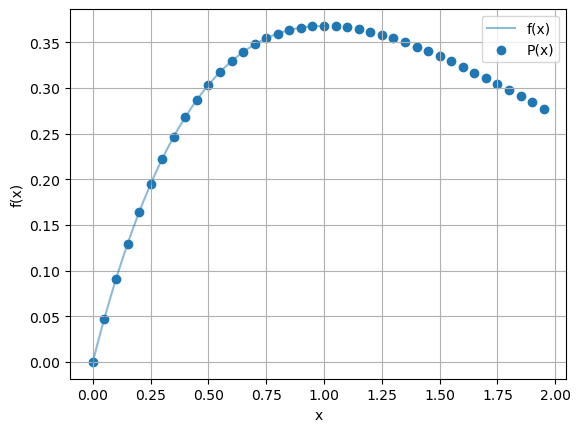

In [8]:
x = np.linspace(0, 1, 10000)
res_table = pd.concat([table.T, new_table.T], ignore_index=True).sort_values('x', ignore_index=True)

fig, ax = plt.subplots()
plt.plot(x, f(x), alpha=0.5, label='f(x)')
ax.scatter(res_table['x'], res_table['f(x)'], label='P(x)', marker='o')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

# Задача 2

2. На отрезке $[a,b]$ заданы функции $f_1(x)$ и $f_2(x)$. Построить многочлены степени $n=3,5,7,10,15,20$, интерполирующие каждую из них по узлам

а) равномерно расположенным на указанном отрезке;

б) расположенным на указанном отрезке оптимальным (минимизирующим погрешность) образом;

В отчет включить графики полученных интерполяционных многочленов, представление использованное при их построении, а также способ выбора узлов.

$$f_1(x) = x\cos(x+5),\quad f_2(x) = \dfrac{1}{1+25x^2},\quad [a,b] = [-5, 5].$$

Запишем в программном виде входные данные:

In [9]:
def f_1(x):
    return x*np.cos(x+5)

def f_2(x):
    return 1 / (1 + 25*x**2)

a, b = -5, 5

## Интерполирование многочленами по узлам равномерно расположенным на отрезке

### Построение интерполяционного многочлена Лагранжа

Запишем общие формулы для построения интерполяционного многочлена Лагранжа.
Если обозначить
$$c_i = \dfrac{1}{(x_i - x_0)\ldots (x_i - x_{i-1})(x_i - x_{i+1})\ldots (x_i-x_n)}$$
и ввести
$$\omega_{n+1}(x) = (x-x_0)\ldots (x-x_n),$$
то $$c_i = \dfrac{1}{w'_{n+1}(x_i)}.$$
Тогда интерпляционный многочлен в форме Лагранжа имеет вид $$P_n(x) = \sum_{i=0}^{n}\dfrac{w_{n+1}(x)}{(x-x_i)}c_if(x_i).$$
Реализуем функцию, которая будет вычислять значение интерполяционного многочлена в форме Лагранжа в заданной точке по этой формуле

In [10]:
def lagrange_interpolation(x, nodes, f):
    def c(x_i, nodes):
        res = 1
        for node in nodes:
            if node == x_i:
                continue
            res *= (x_i - node)
        return 1 / res

    def w(x, nodes):
        product = 1
        for node in nodes:
            product *= (x - node)
        return product
    
    sum = 0
        
    for node in nodes:
        sum += w(x, nodes) * f(node) * c(node, nodes) / (x - node)
    return sum

Реализуем цикл, который будет для каждого $n\in\{3,5,7,10,15,20\}$ строить график обеих рассматриваемых функций $f_1(x)$, $f_2(x)$ на указанном отрезке $[-5,5]$

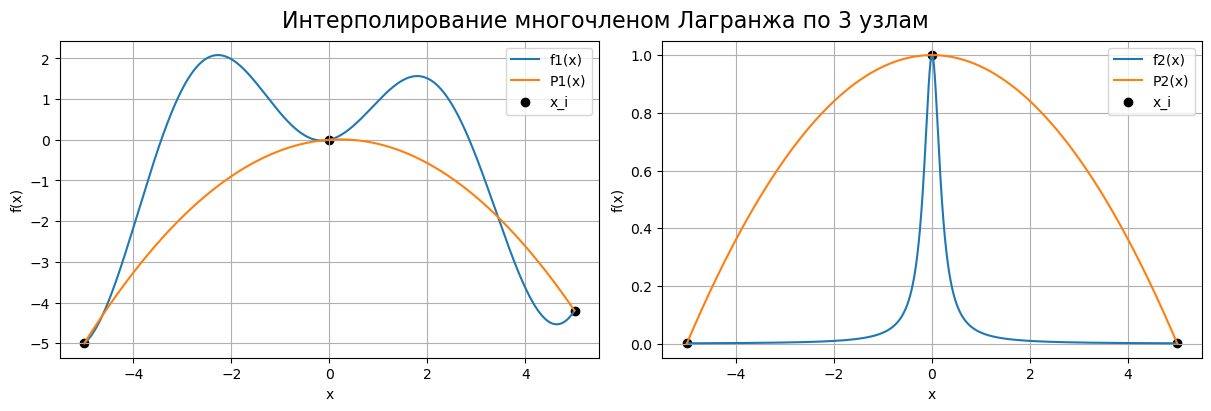

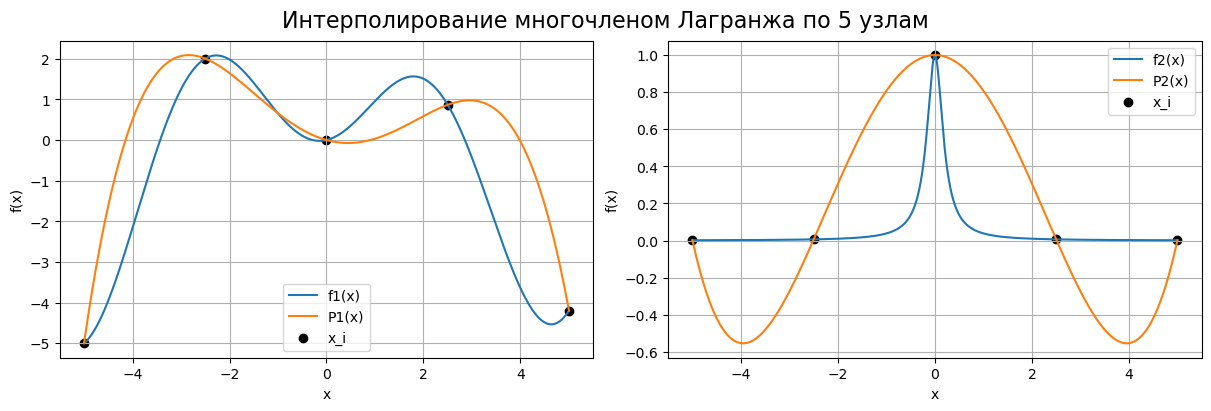

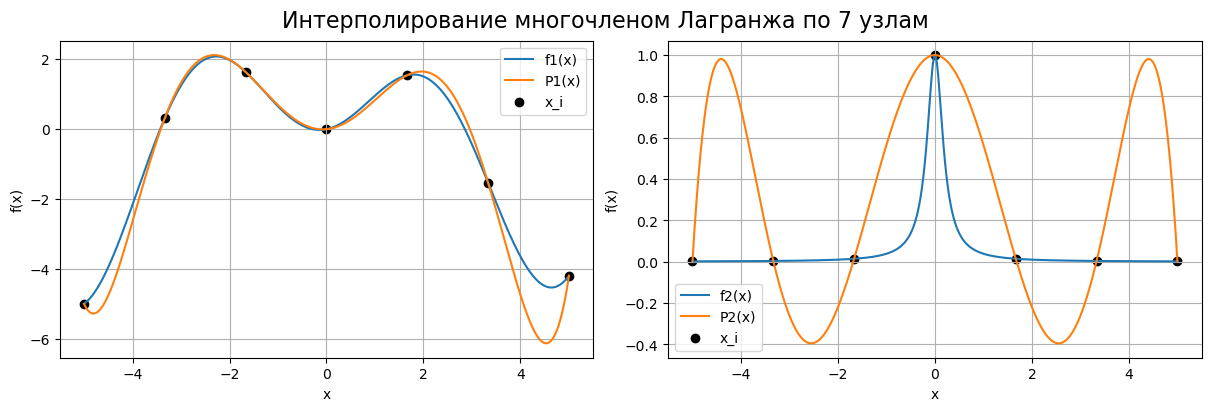

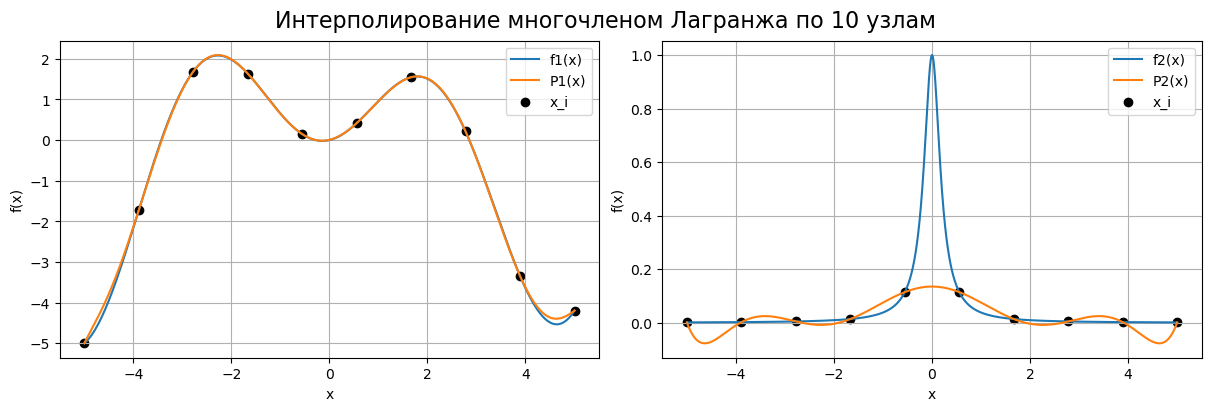

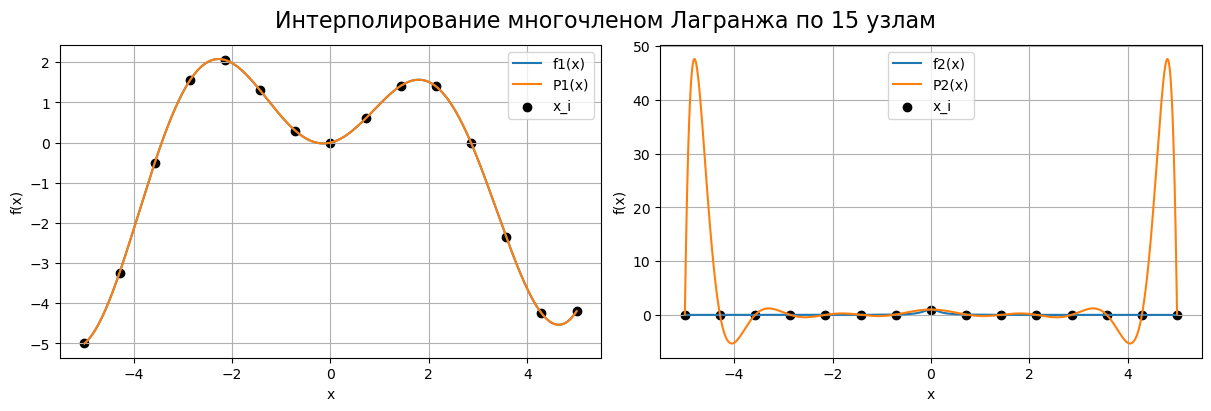

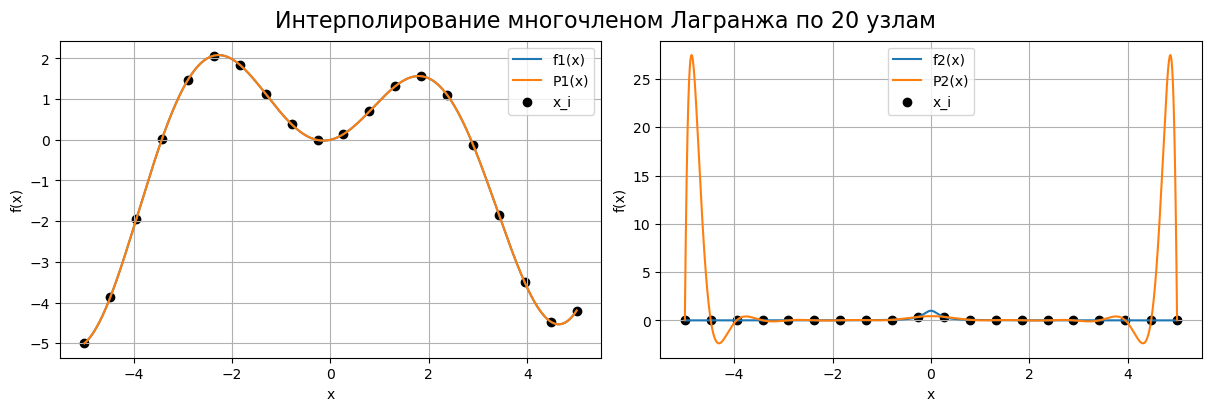

In [11]:
x = np.linspace(a, b, 100000)
for N in [3, 5, 7, 10, 15, 20]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), layout='constrained', sharey=False)
    
    nodes = np.linspace(a, b, N)
    plot_dots = np.setdiff1d(x, nodes)
    
    ax1.plot(x, f_1(x), label='f1(x)')
    ax1.plot(plot_dots, lagrange_interpolation(x=plot_dots, nodes=nodes, f=f_1), label='P1(x)')
    ax1.scatter(nodes, f_1(nodes), label='x_i', color='black')
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.legend()
    ax1.grid()

    ax2.plot(x, f_2(x), label='f2(x)')
    ax2.plot(plot_dots, lagrange_interpolation(x=plot_dots, nodes=nodes, f=f_2), label='P2(x)')
    ax2.scatter(nodes, f_2(nodes), label='x_i', color='black')
    ax2.set_xlabel('x')
    ax2.set_ylabel('f(x)')
    ax2.legend()
    ax2.grid()

    fig.suptitle(f'Интерполирование многочленом Лагранжа по {N} узлам', fontsize=16)

### Построение интерполяционного многочлена Ньютона

$\bullet$ **Разделенная разность нулевого порядка для функции $f(x)$** совпадает со значениями функции $f(x_i)$ в узлах интерполирования. 

**Разделенная разность первого порядка** есть $$f(x_i, x_j) = \dfrac{f(x_j) - f(x_i)}{x_j - x_i}.$$
**Разделенная разность $(k+1)$-ого порядка** $$f(x_0, \ldots, x_{k+1}) = \dfrac{f(x_1,\ldots, x_{k+1}) - f(x_0,\ldots, x_k)}{x_{k+1} - x_0}.$$
Можно показать, что справедлива формула, связывающая разделенную разность $k$-ого порядка со значениями функции в указанных узлах
$$f(x_0, x_1,\ldots, x_k) = \sum_{j=0}^{k} \dfrac{f(x_j)}{\omega_{k+1}'(x_j)}.$$

Используя аппарат разделенных разностей получим формулу интерполяционного многочлена в форме Ньютона
$$P_n(x) = f(x_0) + (x-x_0)\cdot f(x_0, x_1) + (x-x_0)(x-x_1)\cdot f(x_0,x_1,x_2) +\ldots \\ \ldots + (x-x_0)\ldots (x-x_{n-1})\cdot f(x_0,\ldots, x_n).$$

Реализуем функцию, которая будет вычислять значение интерполяционного многочлена в форме Лагранжа в заданной точке по этой формуле

In [12]:
def newtow_interpolation(x, nodes, f):
    def c(x_i, nodes):
        res = 1
        for node in nodes:
            if node == x_i:
                continue
            res *= (x_i - node)
        return 1 / res
    
    def w(x, nodes):
        product = 1
        for node in nodes:
            product *= (x - node)
        return product
    
    def f_div(nodes, f):
        res = 0
        for node in nodes:
            res += f(node) * c(node, nodes)
        return res

    P = 0
    nodes_list = []
    for node in nodes:
        nodes_list.append(node)
        P += f_div(nodes_list, f)*w(x, nodes_list[0:-1])
    return P

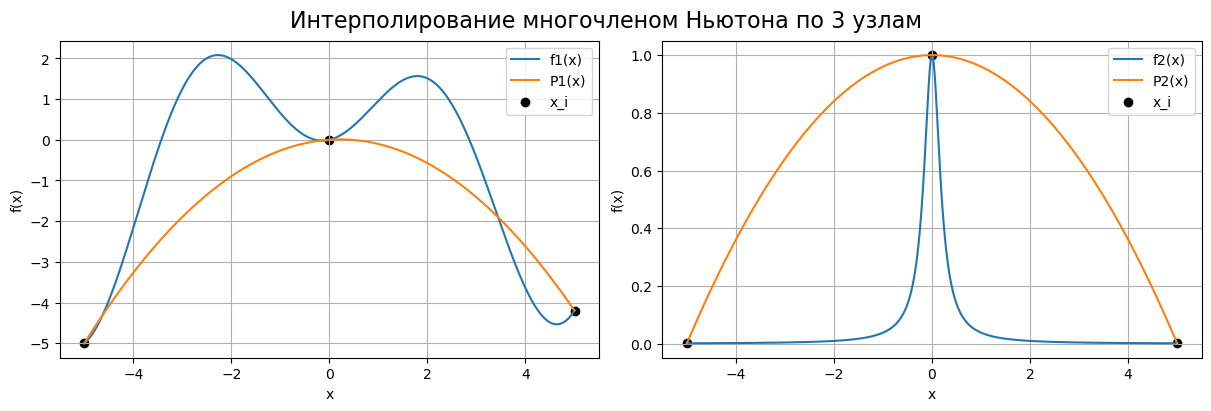

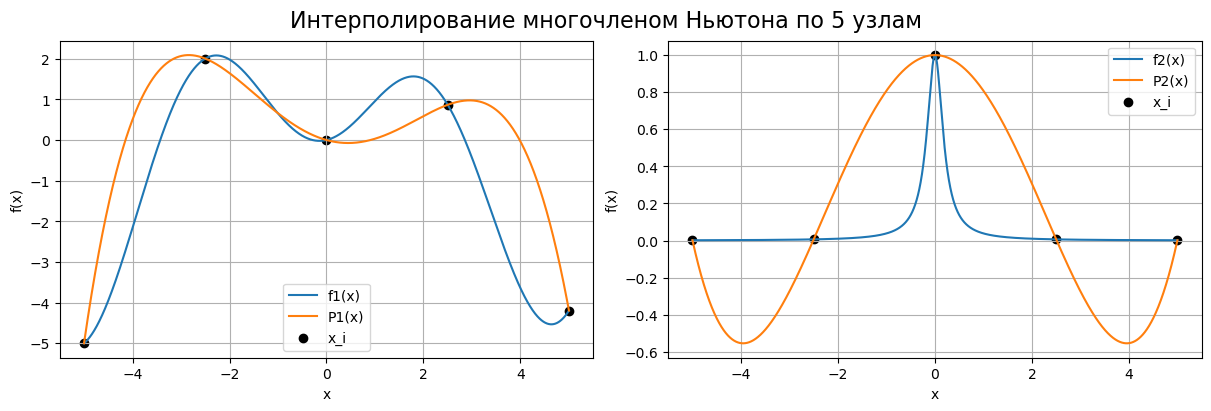

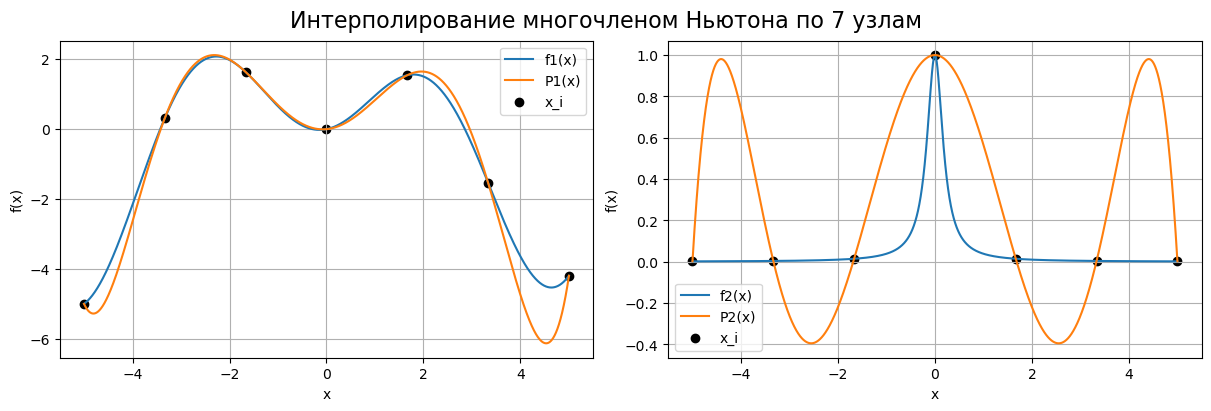

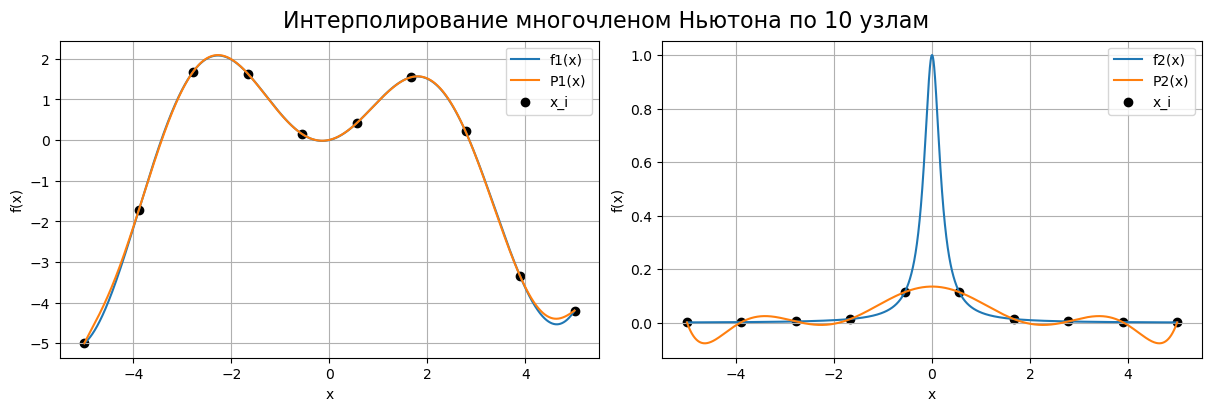

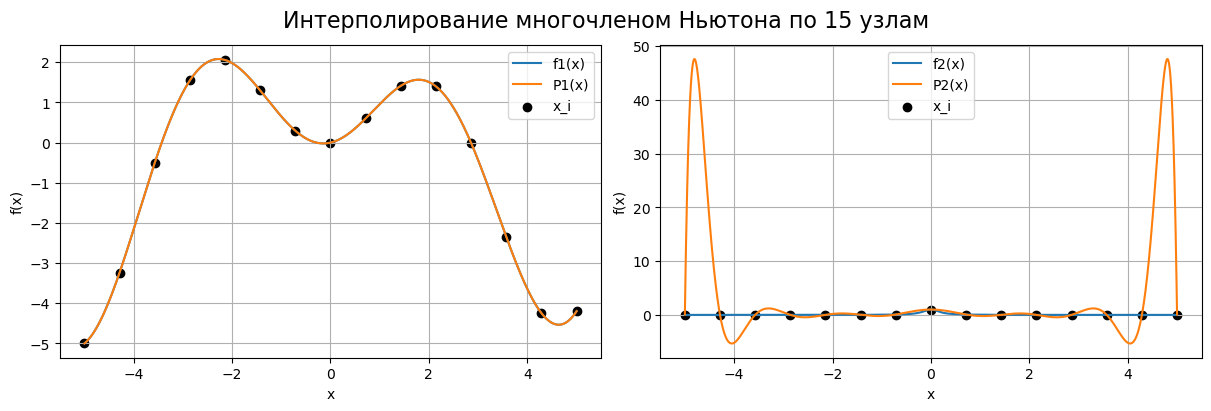

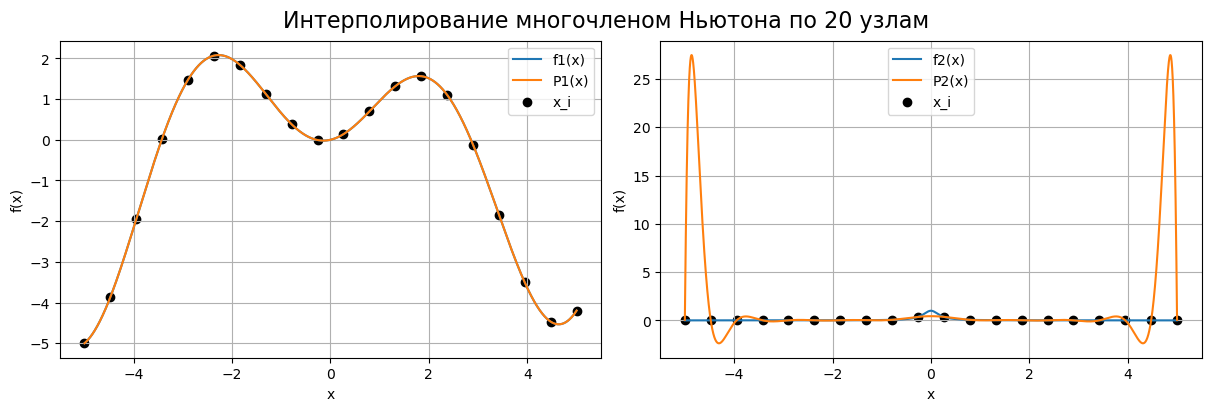

In [13]:
x = np.linspace(a, b, 100000)
for N in [3, 5, 7, 10, 15, 20]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), layout='constrained', sharey=False)
    
    nodes = np.linspace(a, b, N)
    plot_dots = np.setdiff1d(x, nodes)
    
    ax1.plot(x, f_1(x), label='f1(x)')
    ax1.plot(plot_dots, newtow_interpolation(x=plot_dots, nodes=nodes, f=f_1), label='P1(x)')
    ax1.scatter(nodes, f_1(nodes), label='x_i', color='black')
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.legend()
    ax1.grid()

    ax2.plot(x, f_2(x), label='f2(x)')
    ax2.plot(plot_dots, newtow_interpolation(x=plot_dots, nodes=nodes, f=f_2), label='P2(x)')
    ax2.scatter(nodes, f_2(nodes), label='x_i', color='black')
    ax2.set_xlabel('x')
    ax2.set_ylabel('f(x)')
    ax2.legend()
    ax2.grid()

    fig.suptitle(f'Интерполирование многочленом Ньютона по {N} узлам', fontsize=16)

Как можно видеть, результат интерполирования многочленами обеих форм совпадает, что подтверждает правильность реализации компьютерных методов, так как интерполяционное представление функции многочленом единственно. Поэтому далее будем строить интерполирование только по одной из этих форм для компактности.

Также можно заметить из графиков, что многочлен 15-ой степени уже достаточно хорошо описывает функцию $f_1(x)$. Функцию $f_2(x)$ же не удалось достаточно хорошо интерполировать многочленом ни одной степени, результат постоянно колеблется.

## Интерполирование многочленами по узлам расположенным на указанном отрезке оптимальным образом

Для минимизации остатка интерполирования выберем узлы по формуле
$$x_k = \dfrac{a+b}{2} + \dfrac{b-a}{2}\cos \dfrac{(2k+1)\pi}{2(n+1)},\ k=\overline{0,n}.$$
Если выбрать узлами интерполирования $x_0,\ldots, x_n$ таким образом, то величина отклонения $\omega_{n+1}(x)$ от нуля окажется минимальной. 

Для упорядочивания узлов необходима перенумерация $\widetilde{x}_k = x_{n-k},\ k=\overline{0,n}.$

Приведем программное интерполирование многочленом в форме Ньютона по распределенным оптимальным образом узлам. Вся процедура цикла будет аналогична за исключением того, что теперь узлы мы будем вычислять по приведенной выше формуле.

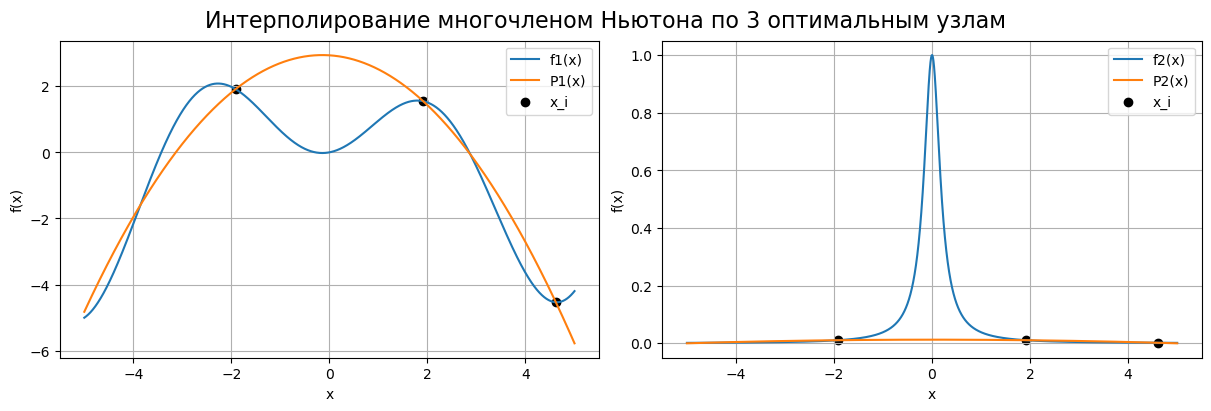

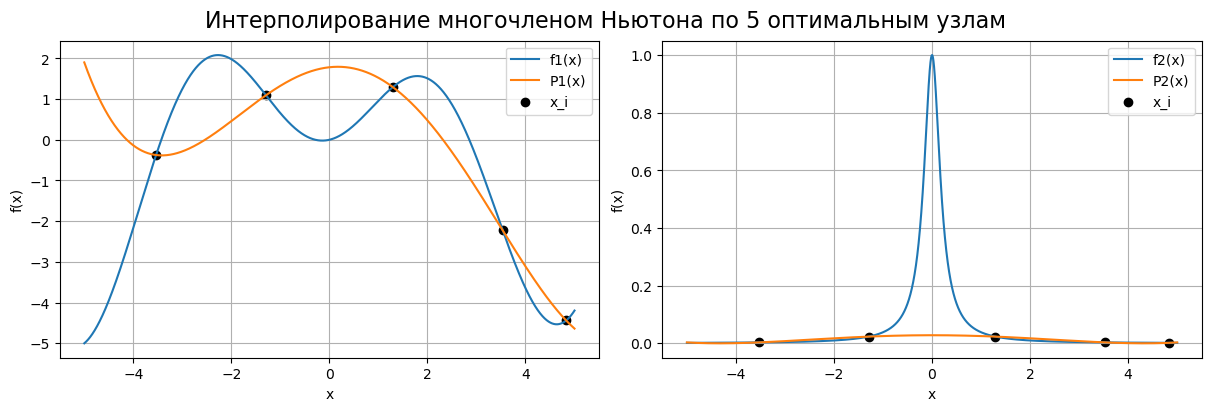

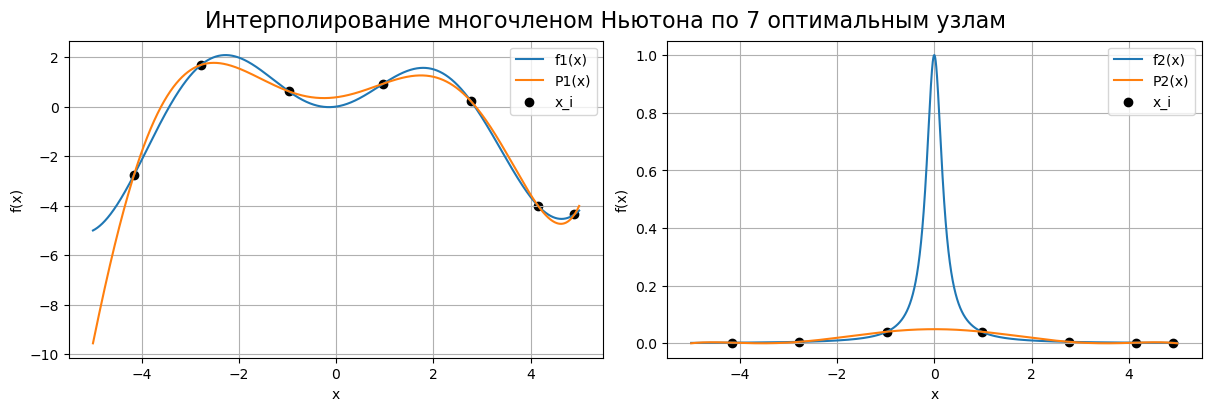

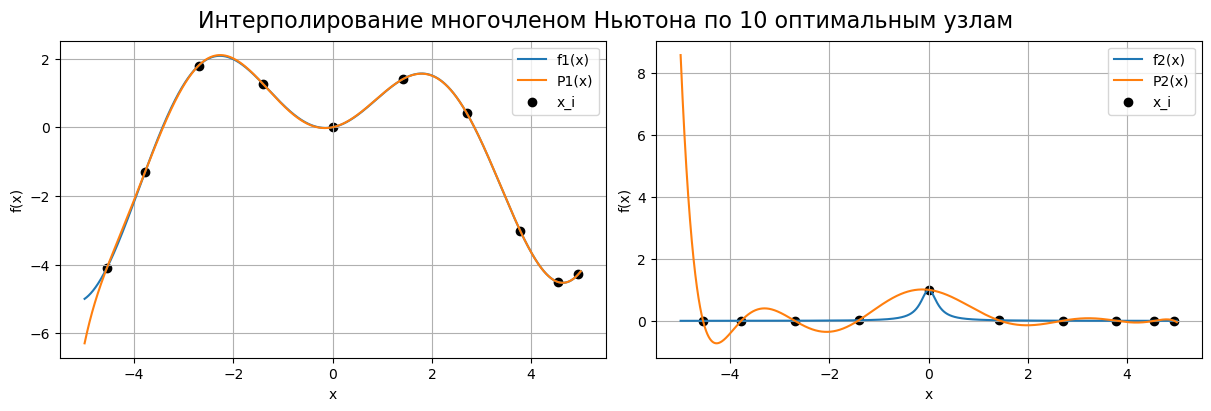

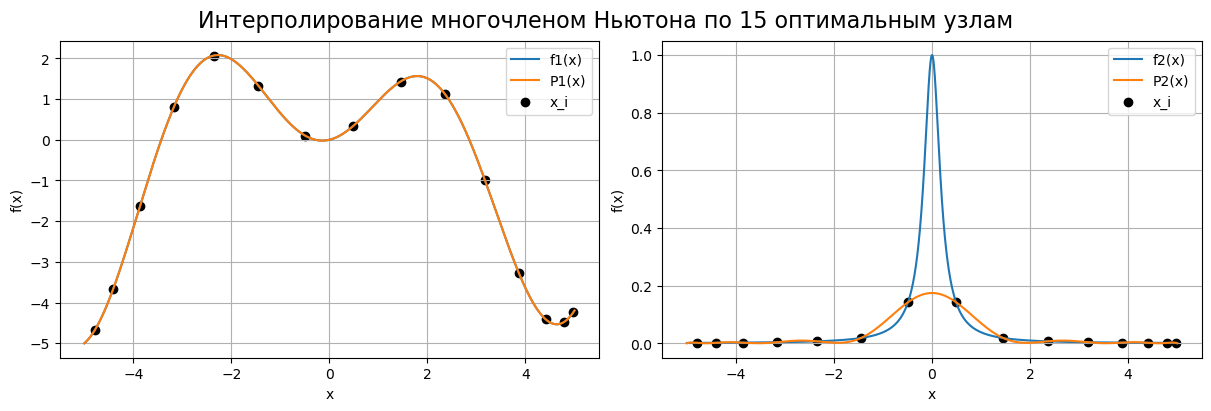

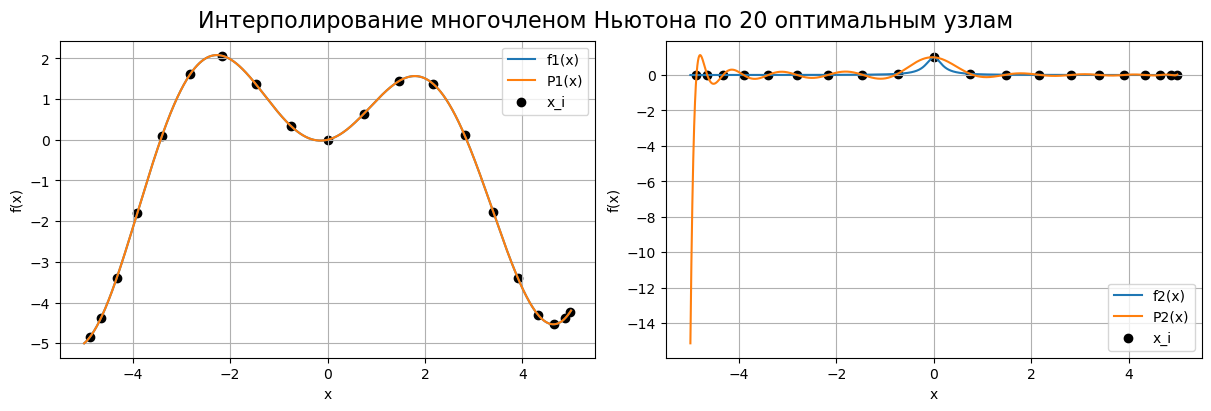

In [14]:
x = np.linspace(a, b, 100000)
for N in [3, 5, 7, 10, 15, 20]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), layout='constrained', sharey=False)
    
    nodes = np.array([(a+b)/2 + (b-a)/2 * np.cos(((2*k+1)*np.pi)/(2*(N+1))) for k in range(N)][::-1])
    plot_dots = np.setdiff1d(x, nodes)
    
    ax1.plot(x, f_1(x), label='f1(x)')
    ax1.plot(plot_dots, newtow_interpolation(x=plot_dots, nodes=nodes, f=f_1), label='P1(x)')
    ax1.scatter(nodes, f_1(nodes), label='x_i', color='black')
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.legend()
    ax1.grid()

    ax2.plot(x, f_2(x), label='f2(x)')
    ax2.plot(plot_dots, newtow_interpolation(x=plot_dots, nodes=nodes, f=f_2), label='P2(x)')
    ax2.scatter(nodes, f_2(nodes), label='x_i', color='black')
    ax2.set_xlabel('x')
    ax2.set_ylabel('f(x)')
    ax2.legend()
    ax2.grid()

    fig.suptitle(f'Интерполирование многочленом Ньютона по {N} оптимальным узлам', fontsize=16)

Как можно видеть, результаты интерполирования оказались аналогичны предыдущему варианту. Хорошее приближение для $f_1(x)$ удалось построить только с помощью многочлена 15-ой степени, а вот для $f_2(x)$ интерполяционный многочлен сильно колеблется и не может хорошо приблизить эту функцию.

# Вывод


**По первой задаче**.

Мы построили новую таблицу узлов и значений в них для заданной функции, используя интерполирование при равноотстоящих узлах. Аналогичным образом можно строить и новые узлы и значения между построенными. Как можно было увидеть из графика, построенные точки достаточно хорошо описывают заданную функцию, что свидетельствует о правильности построения новой таблицы.

**По второй задаче**.

Мы построили интерполияционные многочлены в форме Лагранжа и Ньютона по заданным распределениям узлов. Функцию $f_1(x)$ удалось хорошо приблизить только многочленом 15-ой степени. Функцию $f_2(x)$ хорошо приблизить не удалось, интерполяционный многочлен сильно колеблется. Это связано со спецификой функции $f_2(x)$, поскольку известно, что для нее интерполяционный процесс не сходится.